<a href="https://colab.research.google.com/github/viky24/NLPROUTING/blob/master/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 20

# Importing data directly from drive

In [2]:
import pandas as pd
import numpy as np
import json
import os
from google.colab import drive
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

In [3]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1P1eL8k8Ye_wn0eTCIQ3PmxdWppcJzpbO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Accidents.csv')

# Importing data directly from Kaggle(This section can be disregarded)

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()


{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16362  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9884  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4554  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3616  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle kernels output babulamani/us-accidents-eda -p /path/to/dest

Kernel log downloaded to /path/to/dest/us-accidents-eda.log 


# Exploratory Data Analysis and model Data Preprocessing

In [6]:
import pandas as pd
data=pd.read_csv("/content/Accidents.csv")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
pd.set_option("max_columns",None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
missing= data.isna().sum().sort_values(ascending = False)/len(data)
missing
#sort out the ones with zeroes
missing[missing != 0]

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
dtype: float64

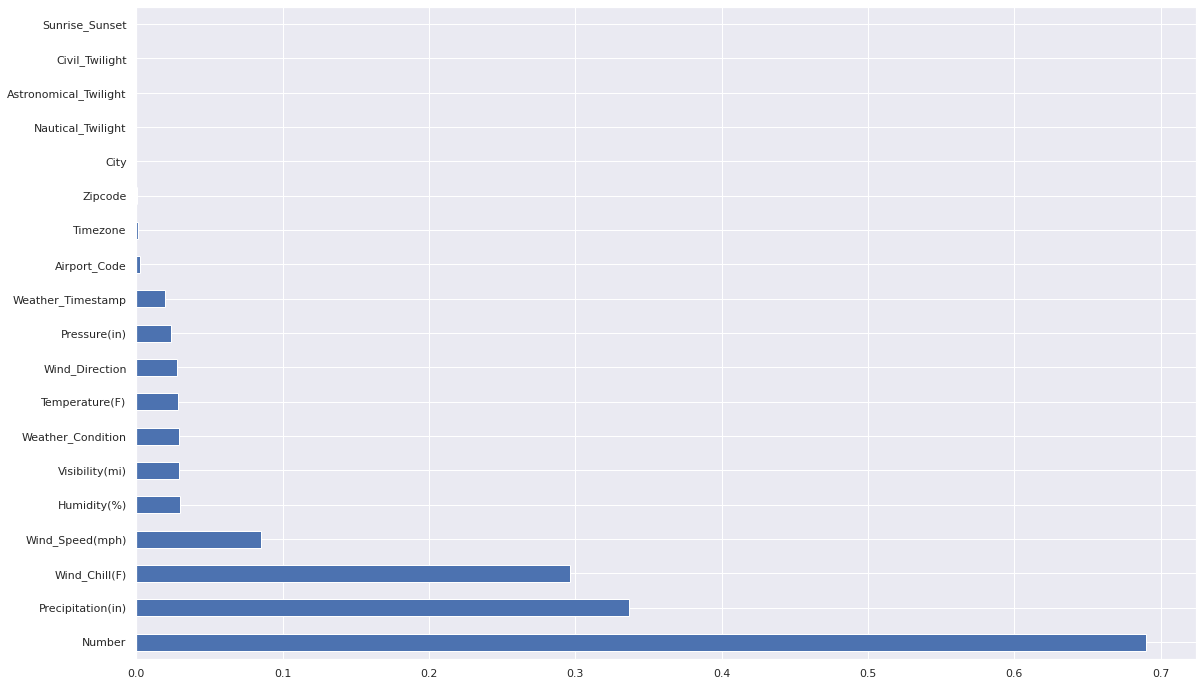

In [ ]:
missing[missing != 0].plot(kind = 'barh')

In [ ]:
datawom=data.drop(['Number'],axis=1)

In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day_of_Week
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0,Monday
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5,Monday
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6,Monday
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6,Monday
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,6,Monday


In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 7.7 MB/s 


In [ ]:

import sweetviz as sv
advert_report = sv.analyze(data)

#display the report
advert_report.show_html('Accidents.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Accidents.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
advert_report.show_html('Accidents.html')

Report Accidents.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(data.shape[0], data.shape[1]))

The Dataset Contains, Rows: 1,516,064 & Columns: 49


In [ ]:
# convert the Start_Time & End_Time Variable into Datetime Feature
data.Start_Time = pd.to_datetime(data.Start_Time)
data.End_Time = pd.to_datetime(data.End_Time)

In [ ]:
for col in data:
  print(col,type(col))

ID <class 'str'>
Severity <class 'str'>
Start_Time <class 'str'>
End_Time <class 'str'>
Start_Lat <class 'str'>
Start_Lng <class 'str'>
End_Lat <class 'str'>
End_Lng <class 'str'>
Distance(mi) <class 'str'>
Description <class 'str'>
Number <class 'str'>
Street <class 'str'>
Side <class 'str'>
City <class 'str'>
County <class 'str'>
State <class 'str'>
Zipcode <class 'str'>
Country <class 'str'>
Timezone <class 'str'>
Airport_Code <class 'str'>
Weather_Timestamp <class 'str'>
Temperature(F) <class 'str'>
Wind_Chill(F) <class 'str'>
Humidity(%) <class 'str'>
Pressure(in) <class 'str'>
Visibility(mi) <class 'str'>
Wind_Direction <class 'str'>
Wind_Speed(mph) <class 'str'>
Precipitation(in) <class 'str'>
Weather_Condition <class 'str'>
Amenity <class 'str'>
Bump <class 'str'>
Crossing <class 'str'>
Give_Way <class 'str'>
Junction <class 'str'>
No_Exit <class 'str'>
Railway <class 'str'>
Roundabout <class 'str'>
Station <class 'str'>
Stop <class 'str'>
Traffic_Calming <class 'str'>
Traffic_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  object        
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  datetime64[ns]
 4   Start_Lat              1516064 non-null  float64       
 5   Start_Lng              1516064 non-null  float64       
 6   End_Lat                1516064 non-null  float64       
 7   End_Lng                1516064 non-null  float64       
 8   Distance(mi)           1516064 non-null  float64       
 9   Description            1516064 non-null  object        
 10  Number                 469969 non-null   float64       
 11  Street                 1516064 non-null  object        
 12  Side                   15160

In [ ]:
city_data = pd.DataFrame(data['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06,1.516064e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03,1.255732e+01
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01,6.188610e+00
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00,8.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,1.400000e+01
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.700000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01,2.300000e+01


In [ ]:
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     viridis
ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep        dense
gray        haline      ice         matter      solar       speed       tempo       thermal
turbid      armyrose    brbg        earth       fall        geyser      prgn        piyg
picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral    tealrose
temps       tropic      balance     curl        delta       edge        hsv         icefire


In [ ]:
schoropleth=px.choropleth(data_frame=data,locations=data.State.value_counts().index,locationmode='USA-states',color=data.State.value_counts().array,color_continuous_scale='purples',scope='usa',title='USA')
schoropleth.update_layout(paper_bgcolor='#ffffff',showlegend=True, title_x=1)
schoropleth.show()

In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Day_of_Week'],
      dtype='object')

In [ ]:
data_frame=data.City.value_counts()[:15]

In [ ]:
data.City.value_counts()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
East Alton         1
Fairbank           1
Mangum             1
Demopolis          1
Hurdsfield         1
Name: City, Length: 10657, dtype: int64

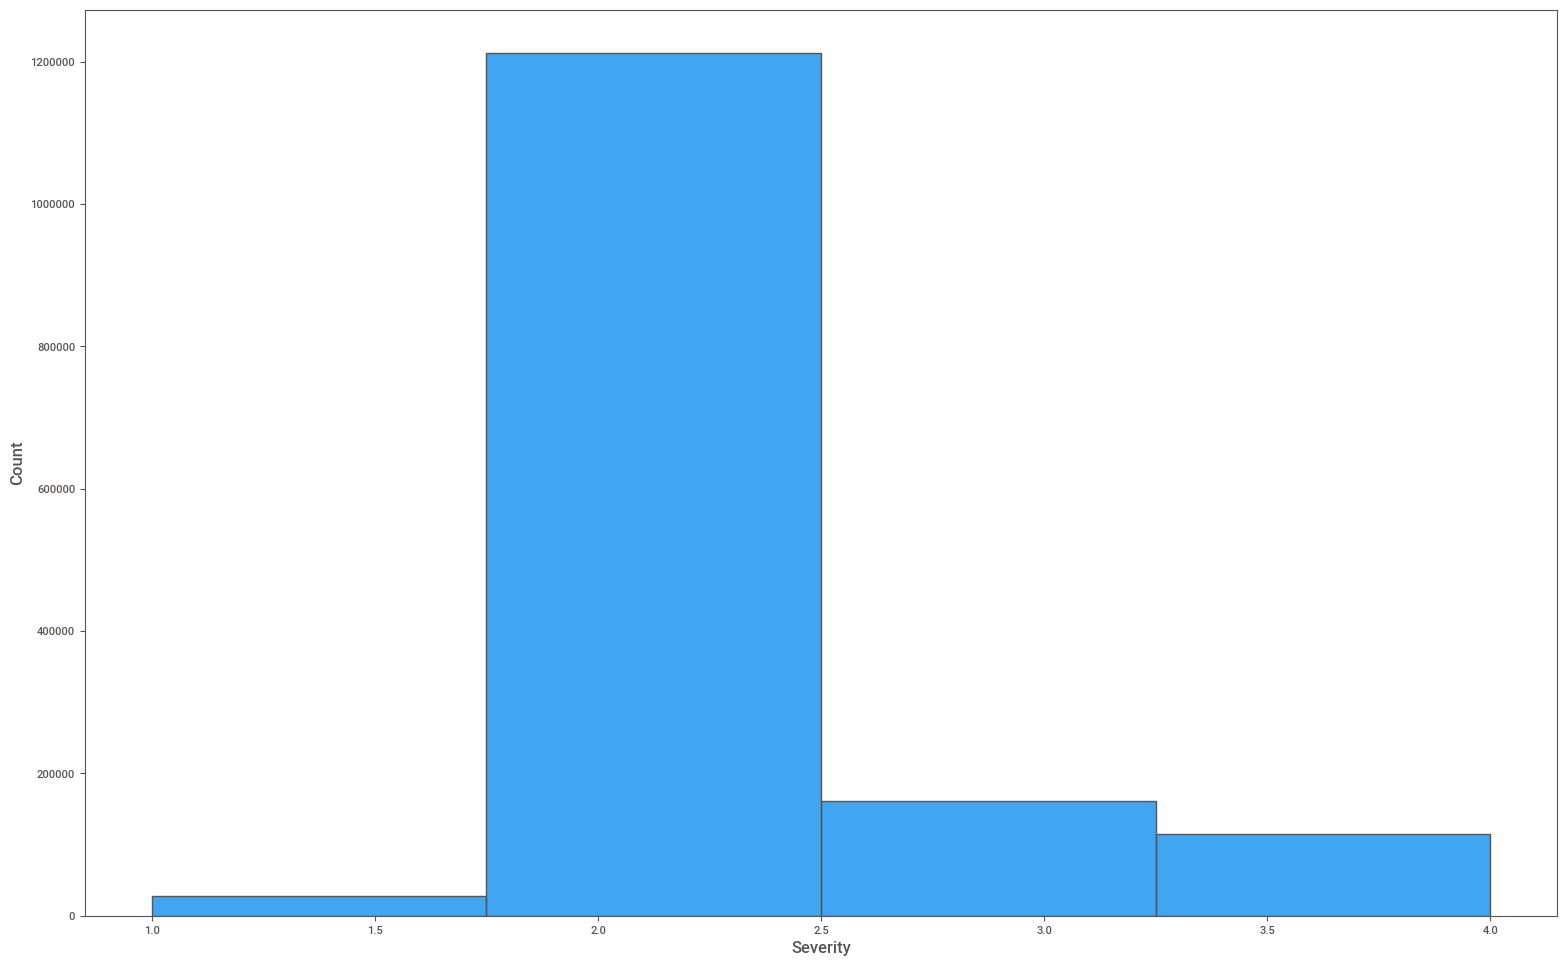

In [ ]:
sns.histplot(data.Severity,bins=4)

Text(0.5, 1.0, 'Accidents Severity heatmap in US ')

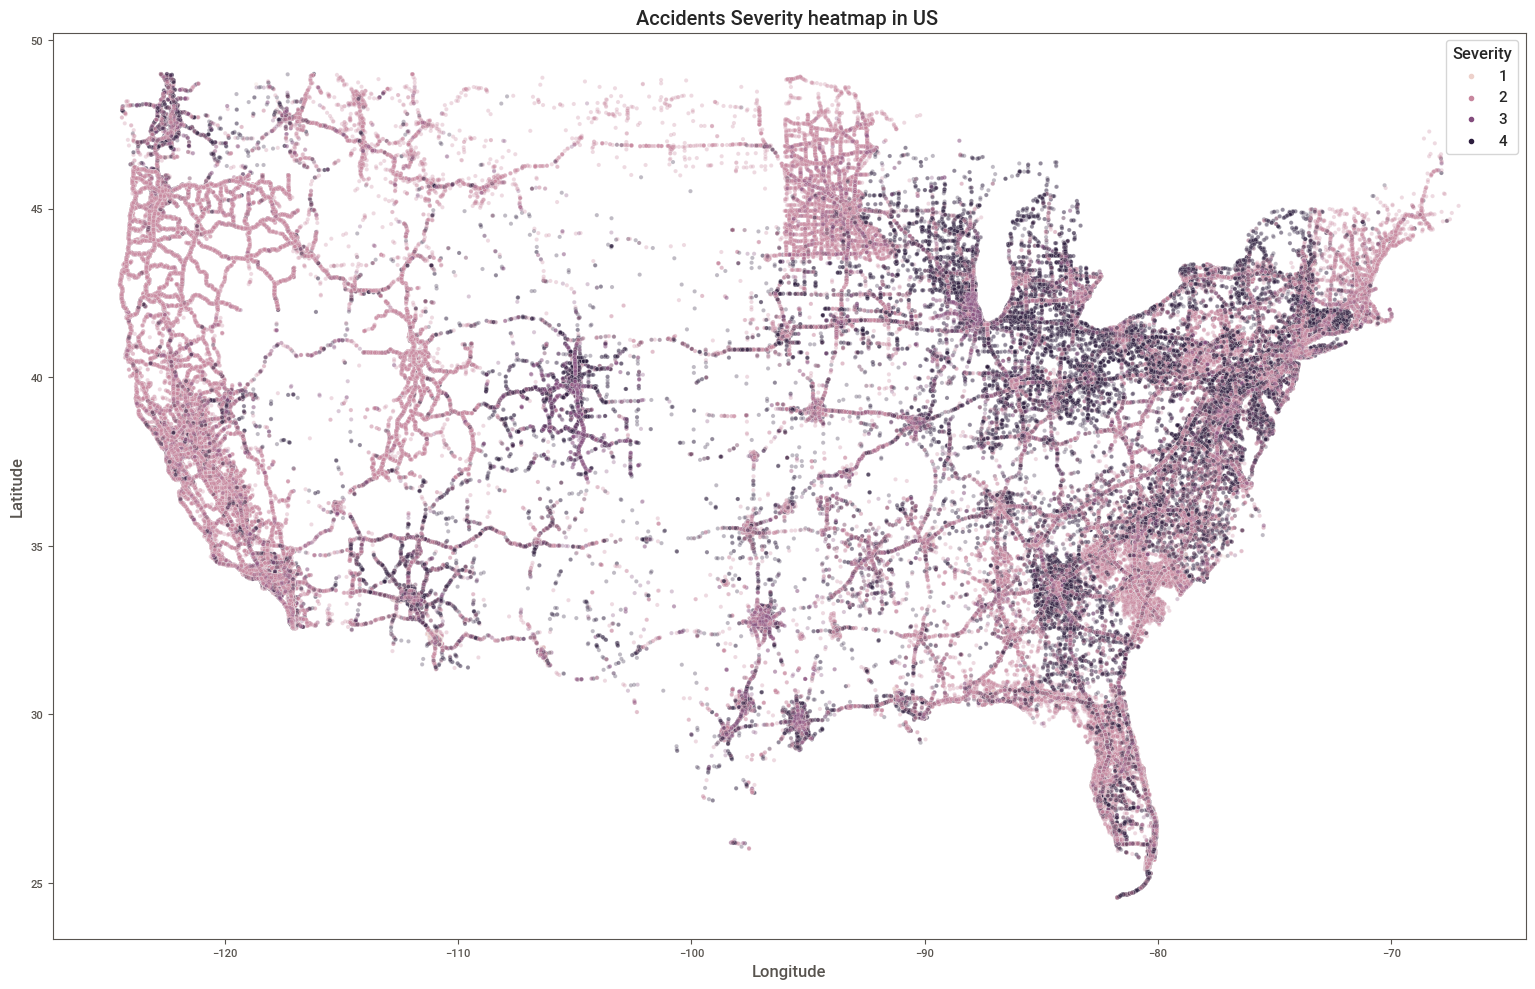

In [ ]:
# Lets see if we can get any insights form the scatter plot of latitude and longitude
sns.scatterplot(y=data.Start_Lat,x=data.Start_Lng,hue=data.Severity,alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Severity heatmap in US ")

In [ ]:
data.Weather_Timestamp=pd.to_datetime(data.Weather_Timestamp)

<Figure size 1200x700 with 0 Axes>

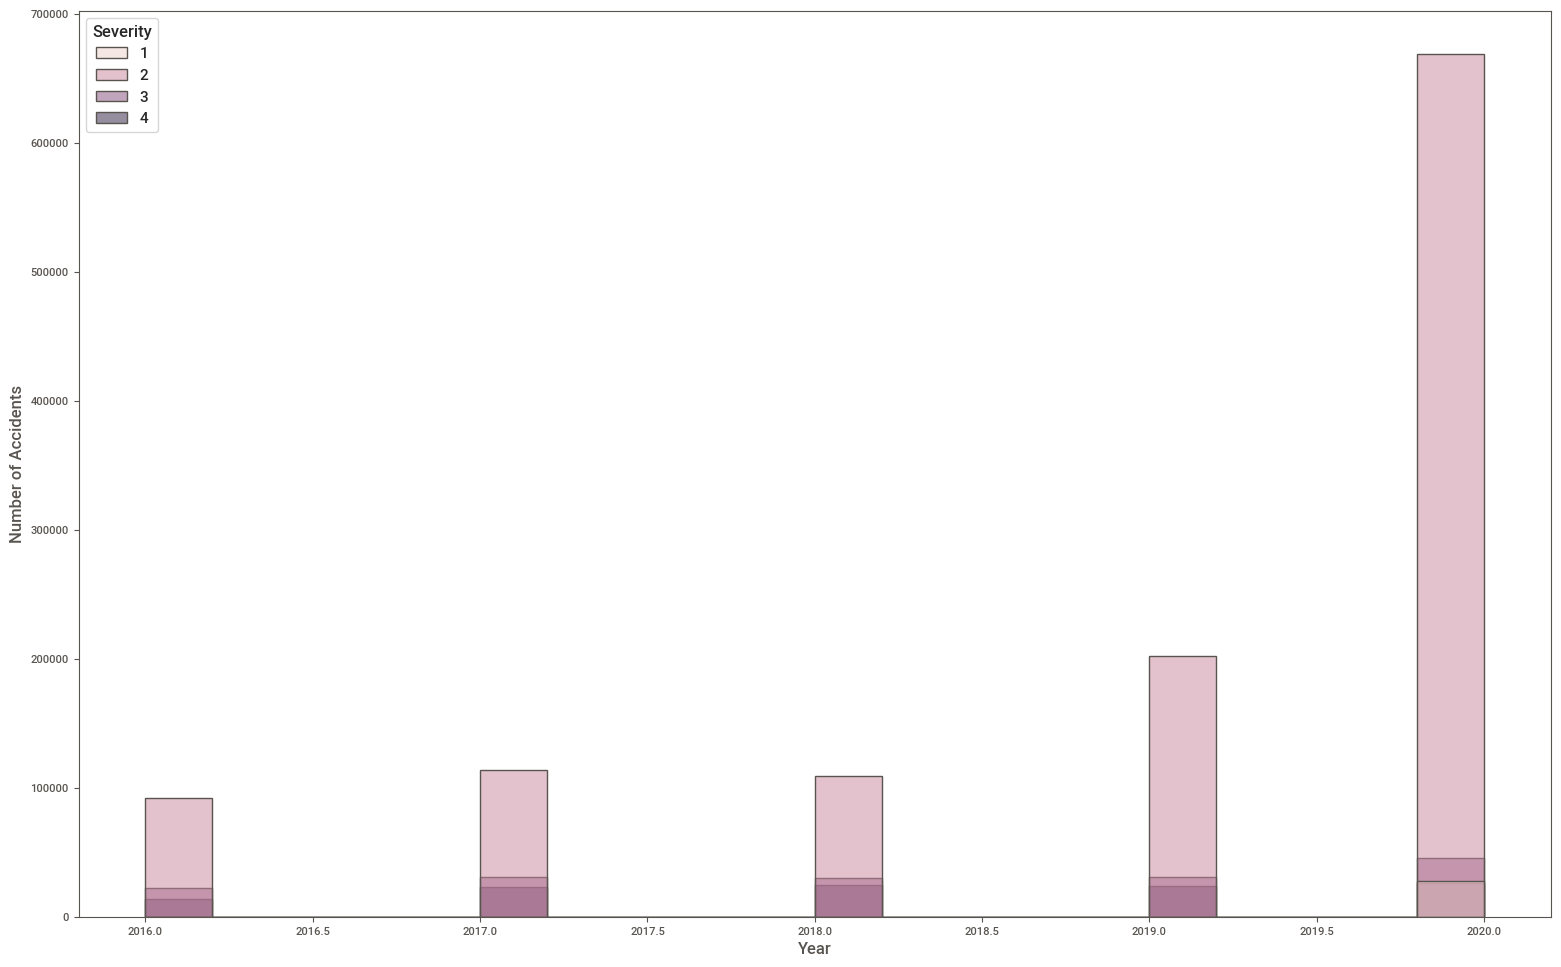

<Figure size 1200x700 with 0 Axes>

In [ ]:
sns.histplot(x=data.Weather_Timestamp.dt.year,bins=20,hue=data.Severity)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.figure(figsize=(12,7))

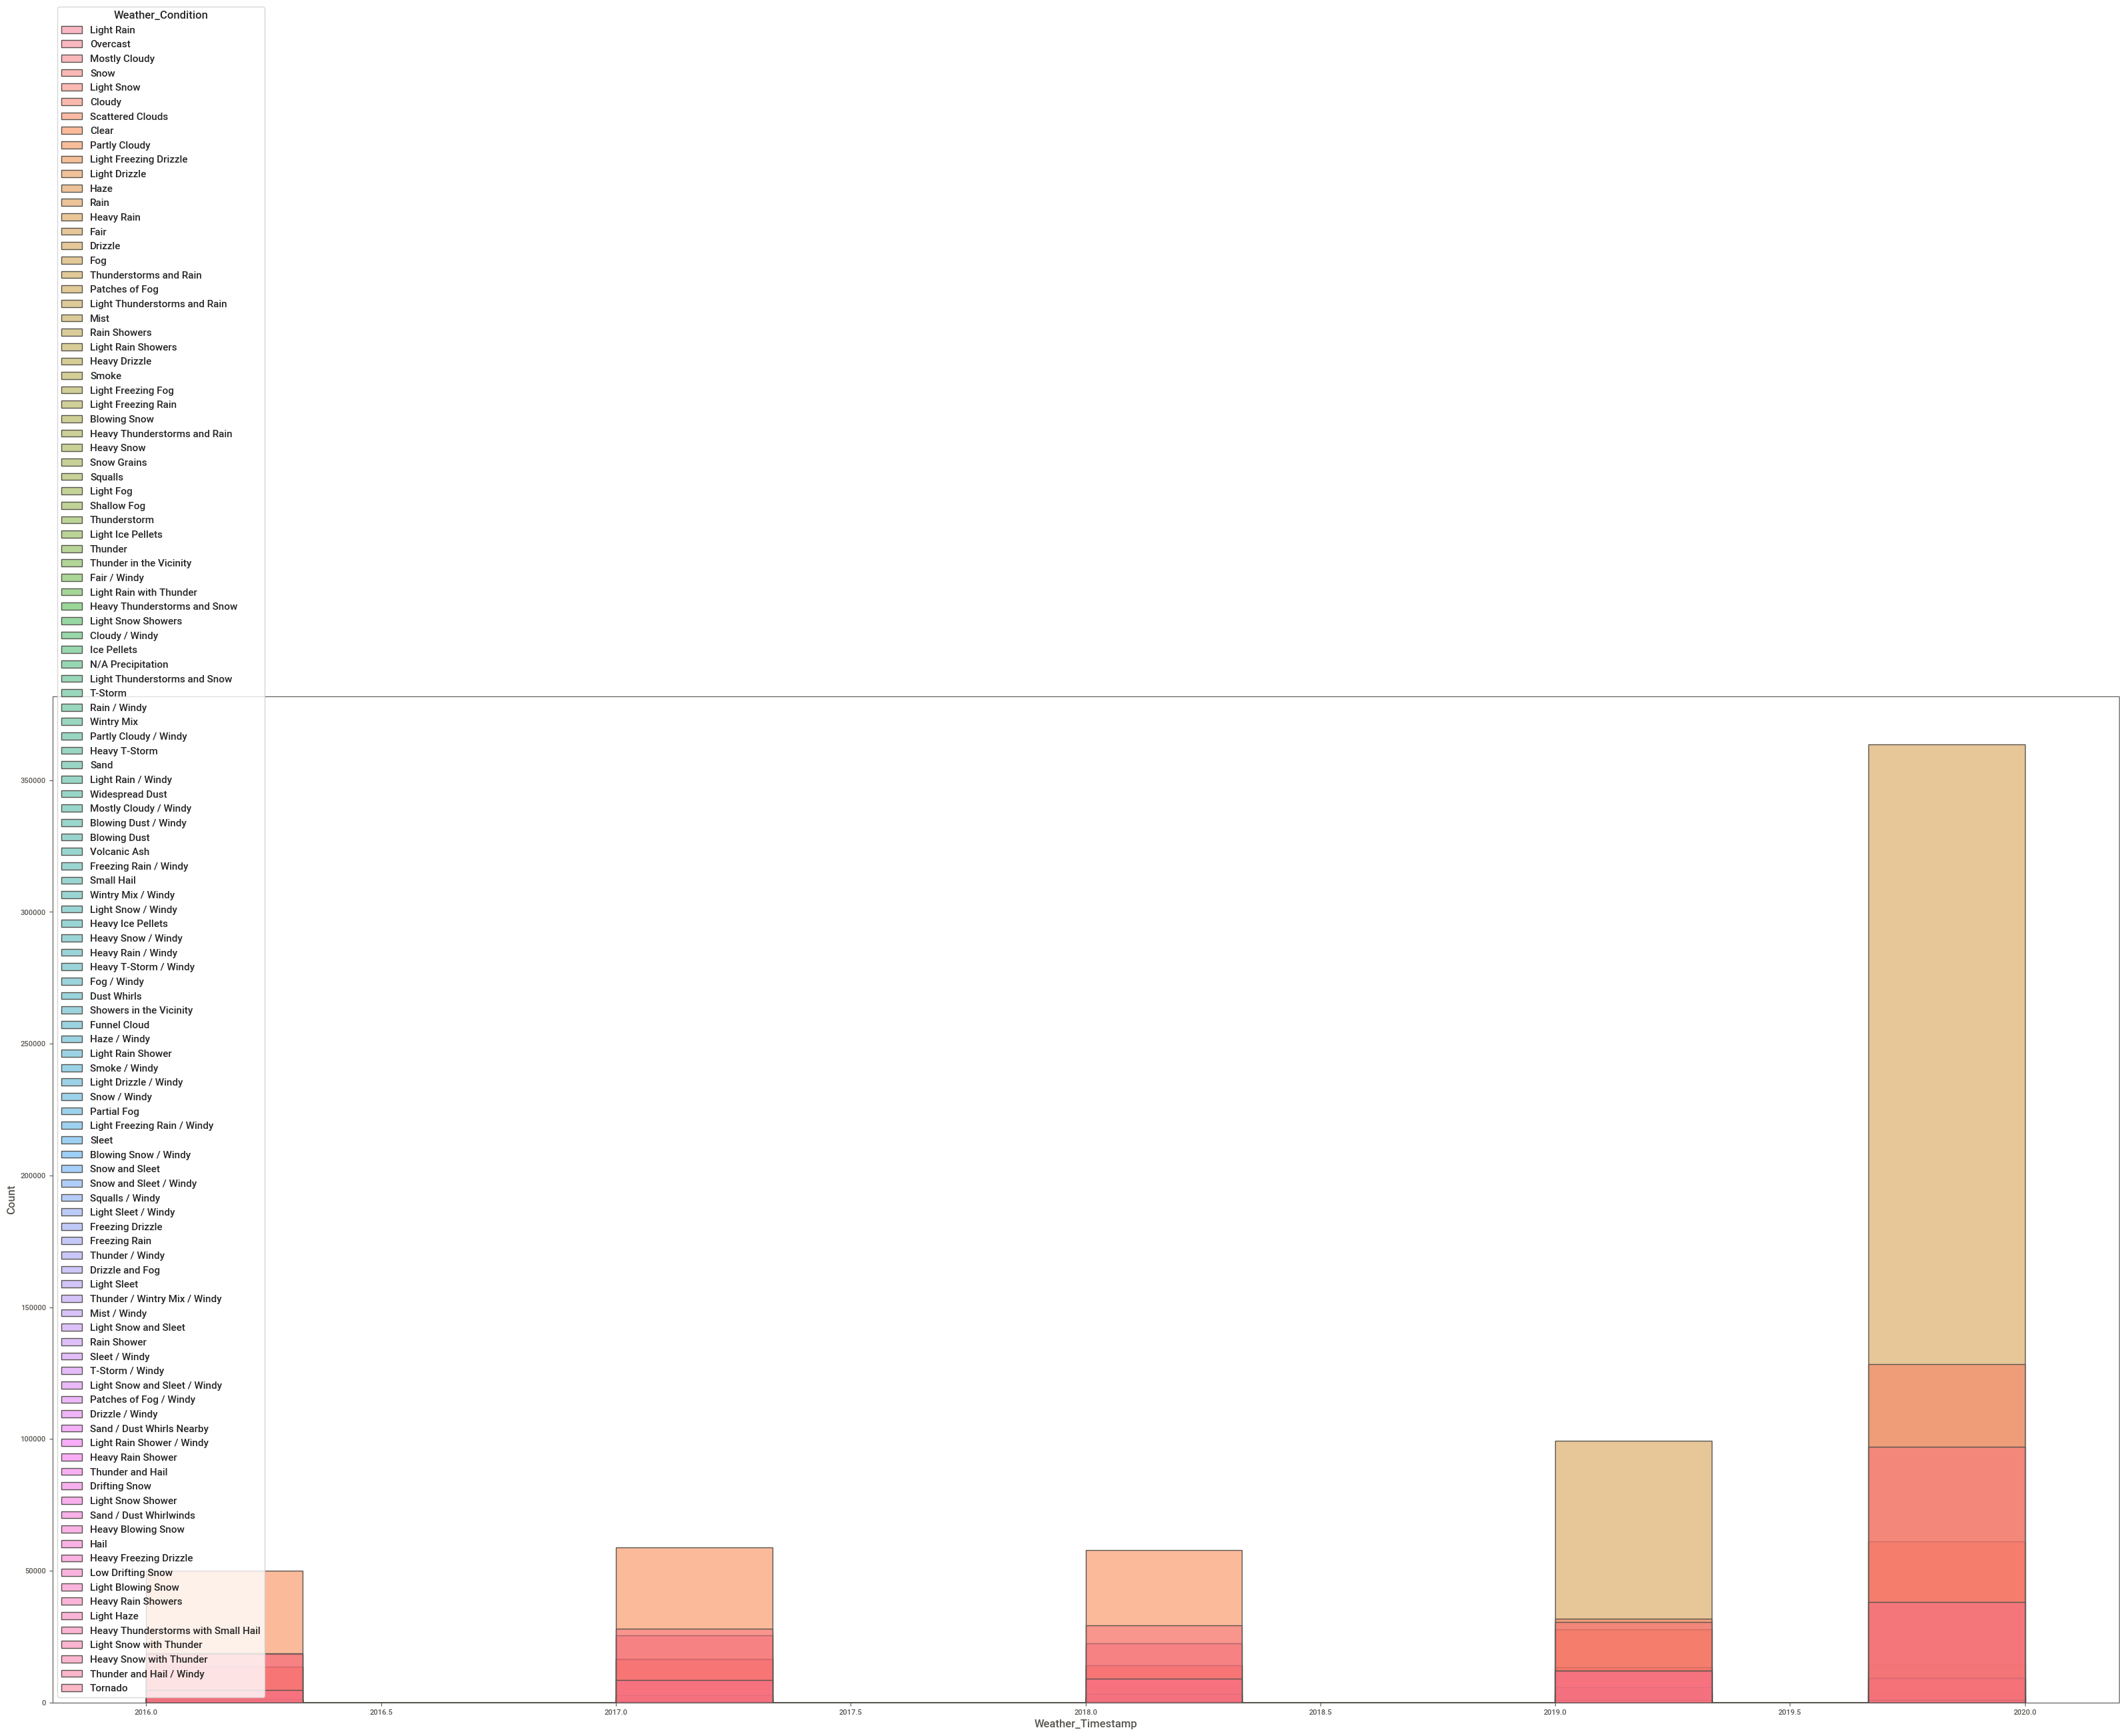

In [ ]:
plt.figure(figsize=(40,20))
sns.histplot(x=data.Weather_Timestamp.dt.year,bins=12,hue=data.Weather_Condition)

Text(0.5, 0, 'hour')

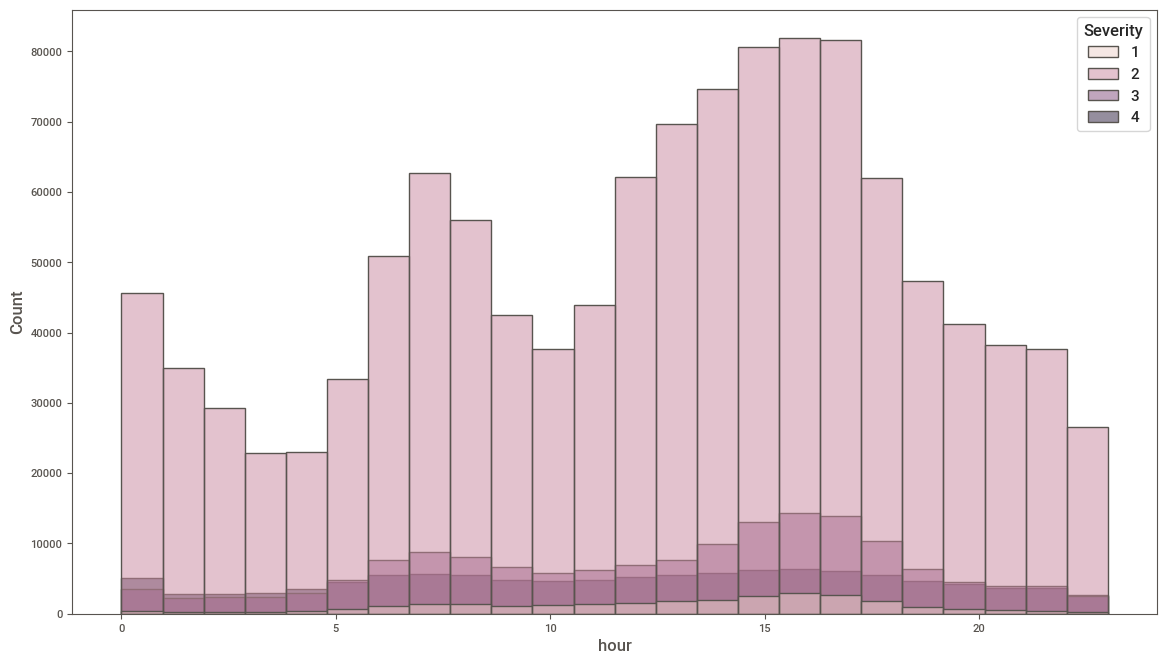

In [ ]:
# accidents hist pot with respect to hour of a day 
plt.figure(figsize=(14,8))
sns.histplot(x=data.Weather_Timestamp.dt.hour,bins=24,hue=data.Severity)
plt.xlabel("hour")

Text(0.5, 0, 'week day')

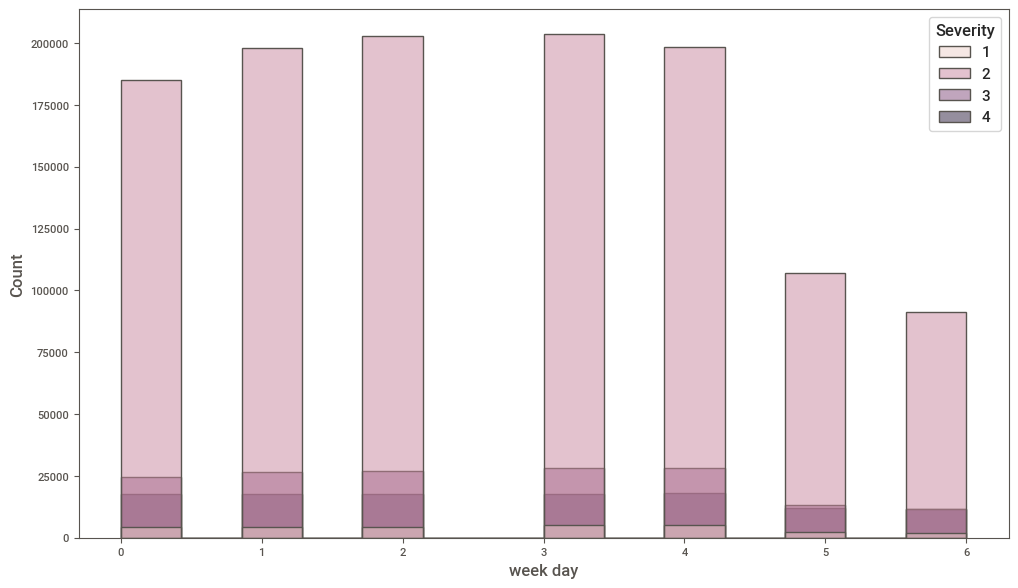

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(x=data.Weather_Timestamp.dt.weekday,bins=14,hue=data.Severity)
plt.xlabel("week day")

In [ ]:
data_p = data[['ID','Severity','Start_Time','Side','City','County','State','Visibility(mi)','Weather_Condition']]

In [ ]:
data_p.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
Side                     0
City                    83
County                   0
State                    0
Visibility(mi)       44211
Weather_Condition    44007
time                     0
dtype: int64

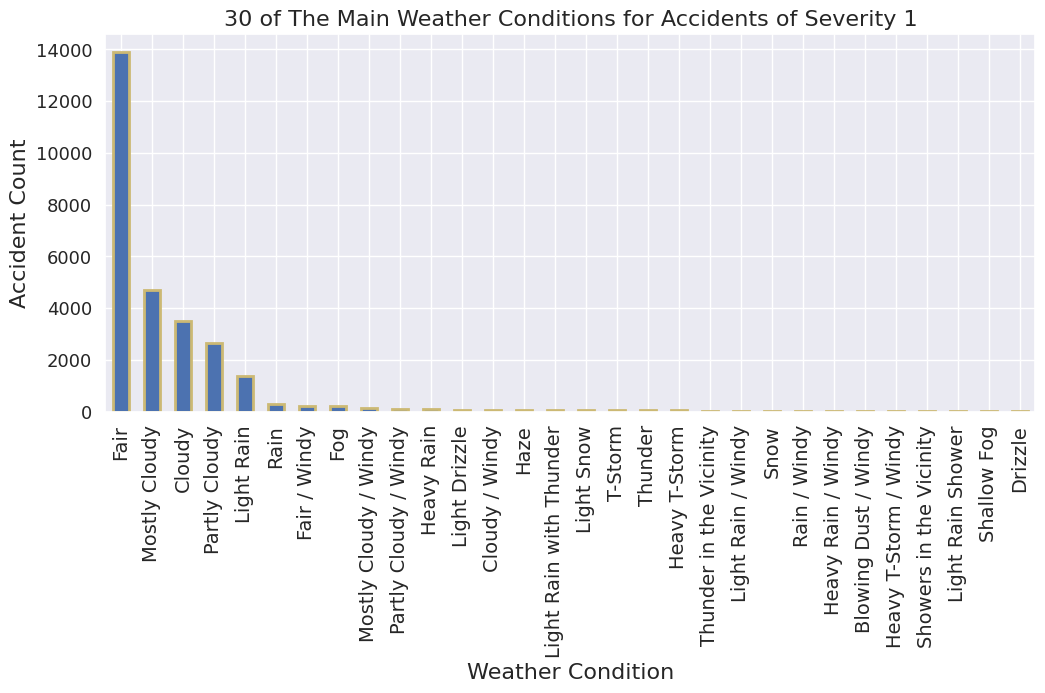

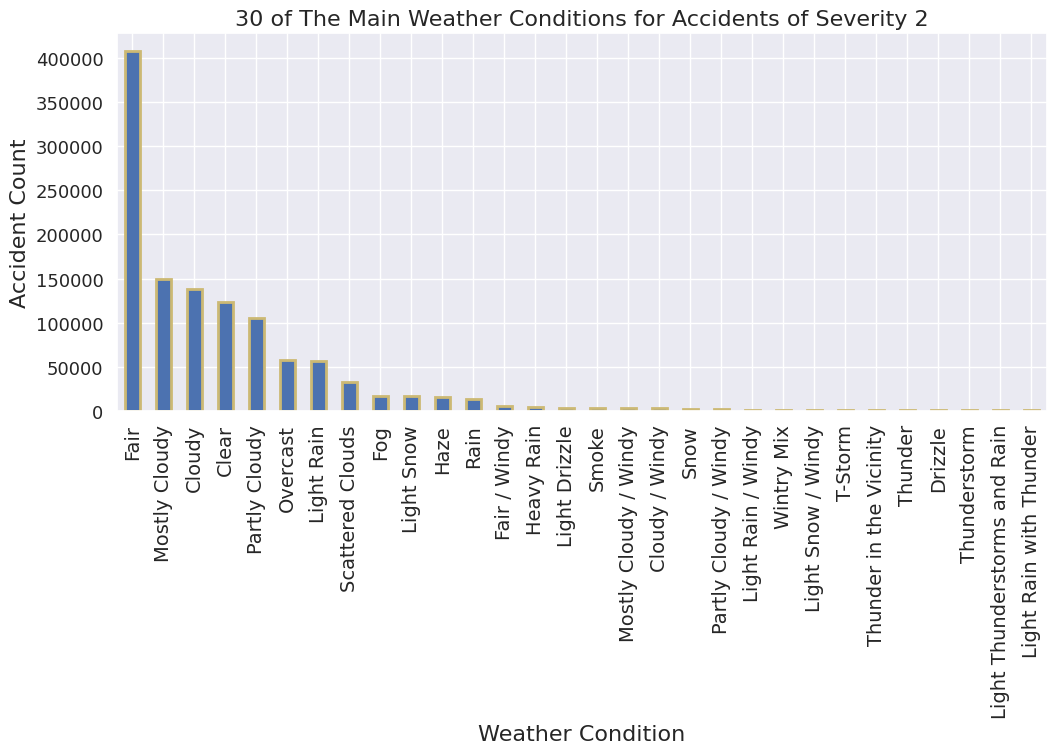

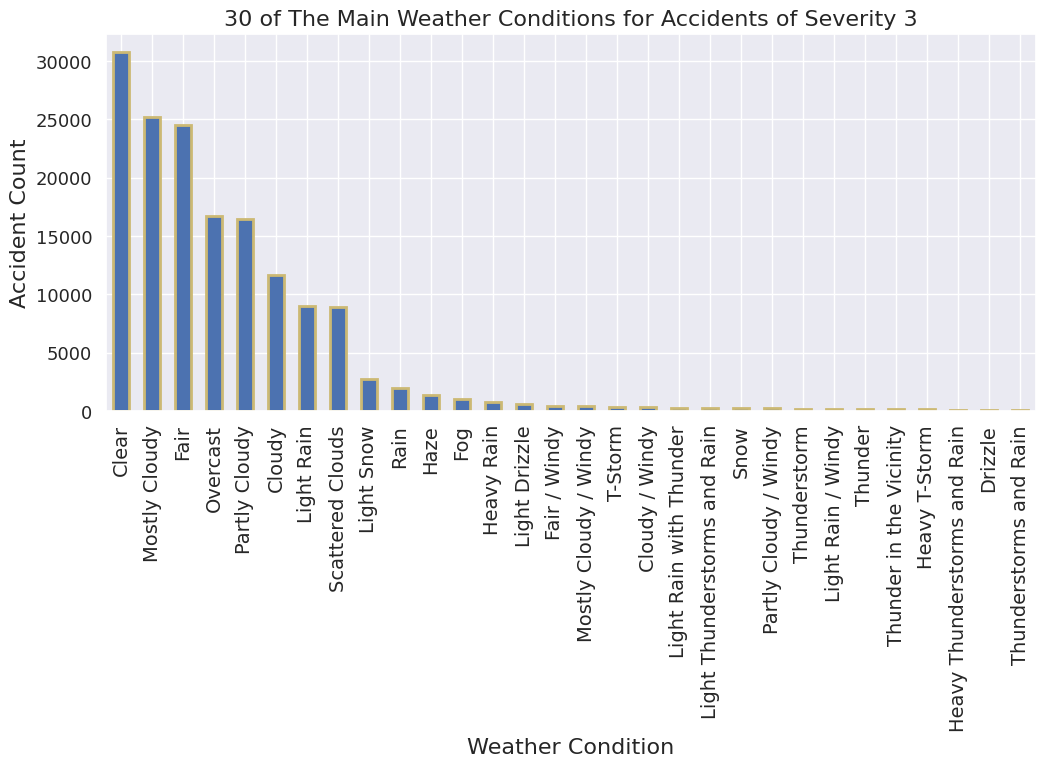

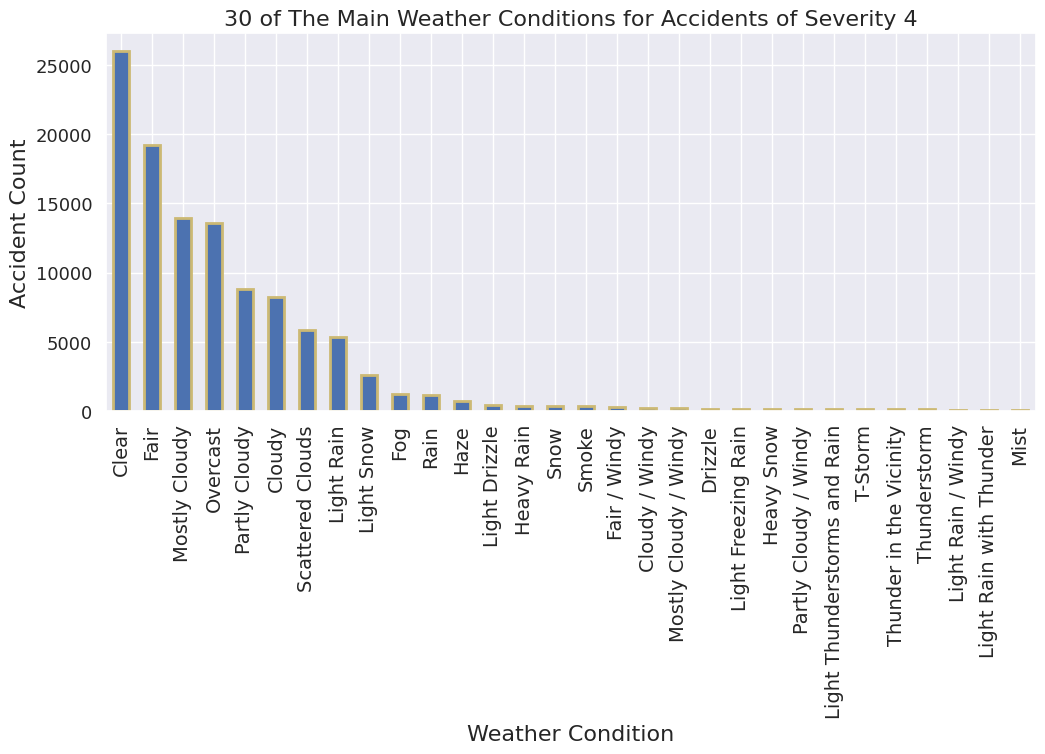

In [ ]:
sns.set()
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    data_p.loc[data_p["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='b',edgecolor='y',align='center',linewidth=2)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('30 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=13)

In [ ]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], infer_datetime_format=True)
data['Day_of_Week'] = data['Start_Time'].dt.day_name()


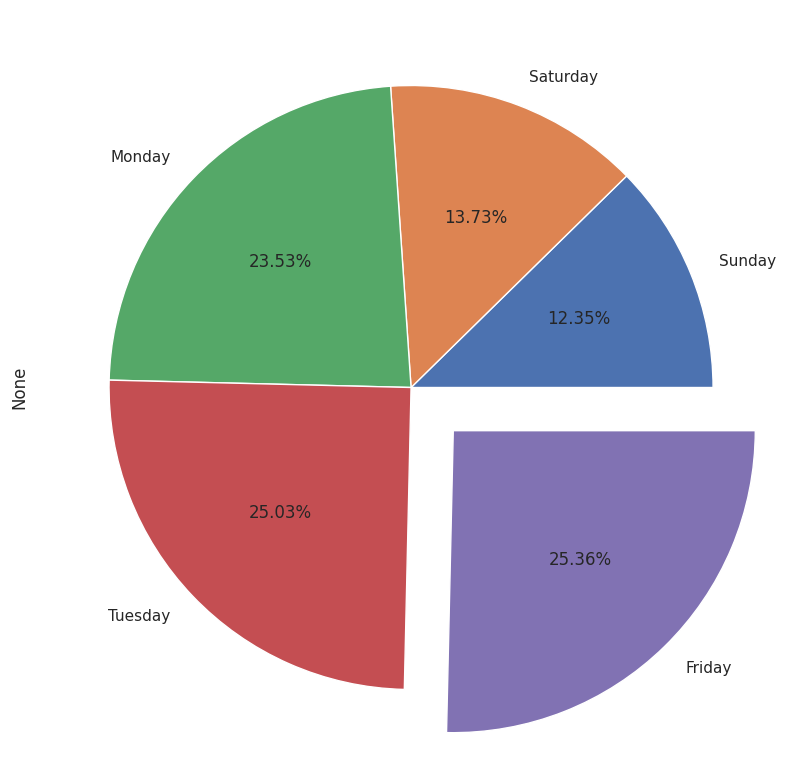

In [ ]:
plt.figure(figsize=(16,10))
data.groupby('Day_of_Week') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0.2],autopct='%1.2f%%')
plt.ioff()

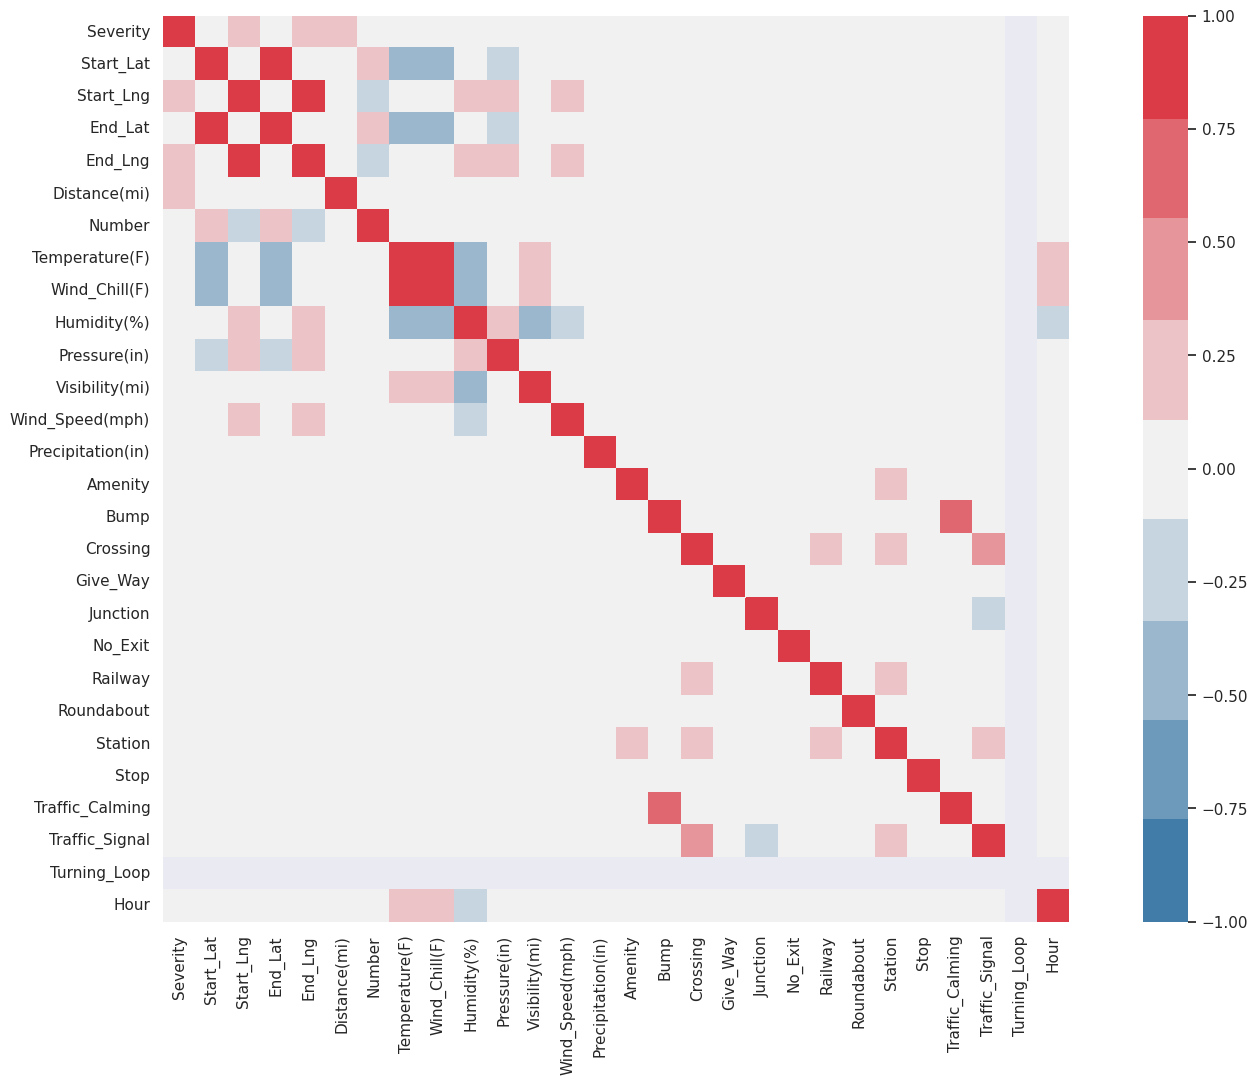

In [ ]:
plt.rcParams['figure.figsize'] = (19,12)
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

In [ ]:
cor = data.corr()

#Correlation with output variable
cor_target = abs(cor["Severity"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
relevant_features

Severity           1.000000
Start_Lat          0.149968
Start_Lng          0.134518
End_Lat            0.149988
End_Lng            0.134542
Distance(mi)       0.167162
Temperature(F)     0.053420
Wind_Chill(F)      0.058900
Humidity(%)        0.055199
Visibility(mi)     0.033727
Wind_Speed(mph)    0.026183
Crossing           0.087809
Junction           0.023431
Traffic_Signal     0.041121
Name: Severity, dtype: float64

In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Day_of_Week'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  object        
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  datetime64[ns]
 4   Start_Lat              1516064 non-null  float64       
 5   Start_Lng              1516064 non-null  float64       
 6   End_Lat                1516064 non-null  float64       
 7   End_Lng                1516064 non-null  float64       
 8   Distance(mi)           1516064 non-null  float64       
 9   Description            1516064 non-null  object        
 10  Number                 469969 non-null   float64       
 11  Street                 1516064 non-null  object        
 12  Side                   15160

Text(0.5, 0, 'dist')

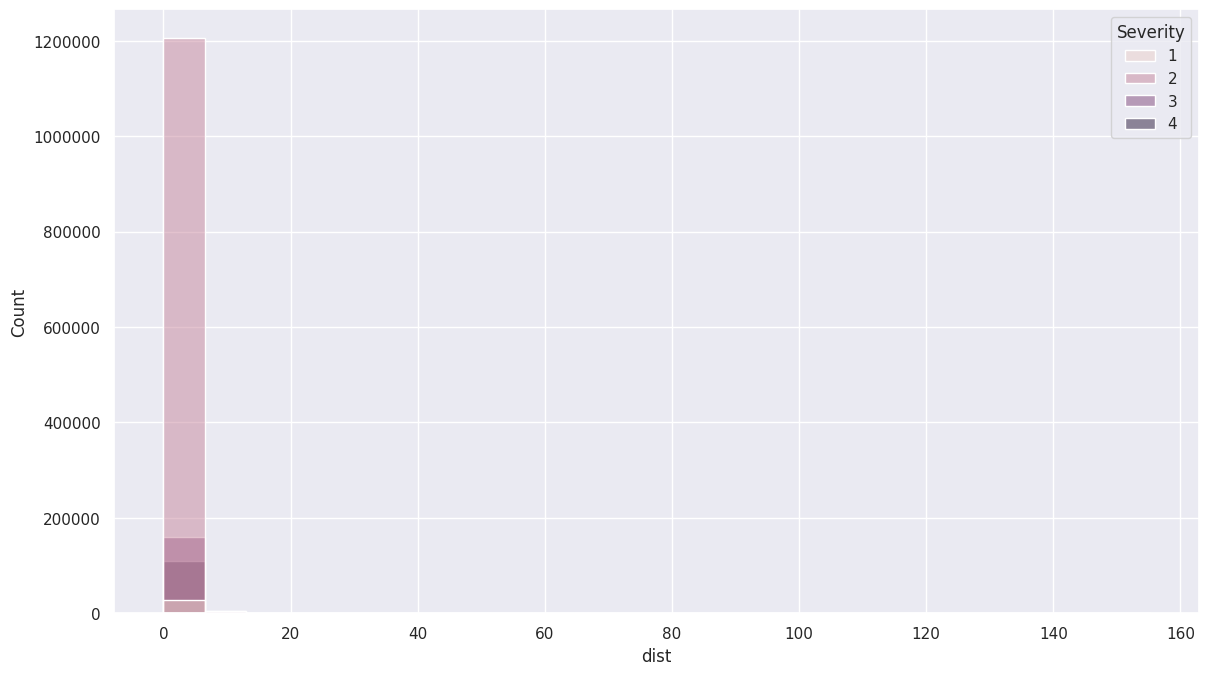

In [ ]:
plt.figure(figsize=(14,8))
sns.histplot(x=data['Distance(mi)'],bins=24,hue=data.Severity)
plt.xlabel("dist")

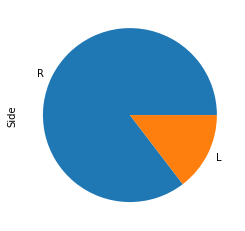

In [ ]:

data['Side'].value_counts().plot.pie()


In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

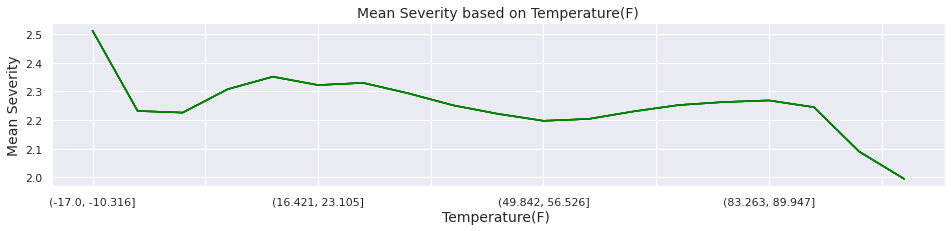

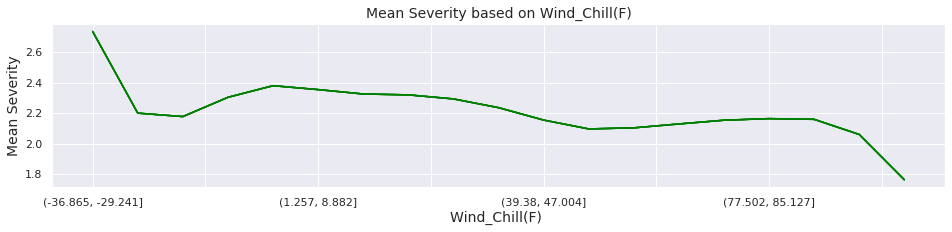

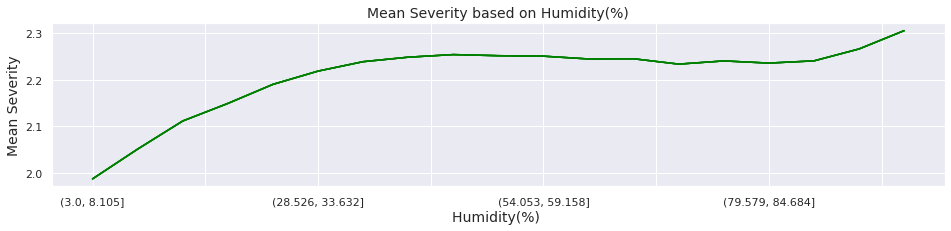

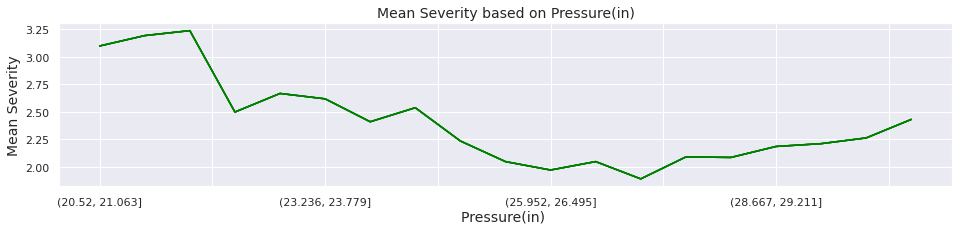

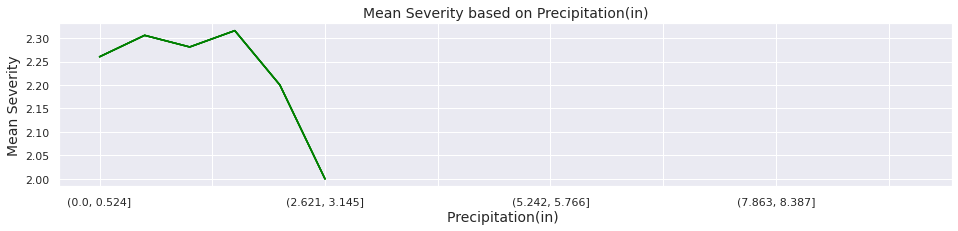

In [ ]:
sns.set()
weather_factor = [ 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)']

for factor in weather_factor:
   
    mini = data[factor].quantile(q=0.0001)
    maxi = data[factor].quantile(q=0.9999)
    
    plt.subplots(figsize=(16,3))
    for s in np.arange(1,5):
        data["Severity"].groupby(pd.cut(data[factor], np.linspace(mini,maxi,num=20))).mean().plot(color=['green'])
        plt.title("Mean Severity based on " + factor, fontsize=14)
        plt.xlabel(factor + " ", fontsize=14)
        plt.ylabel("Mean Severity", fontsize=14)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

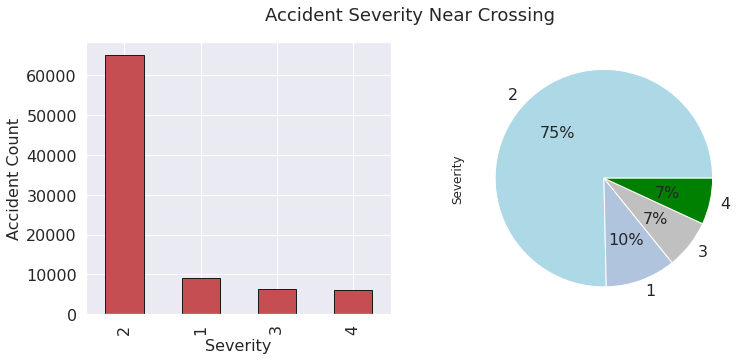

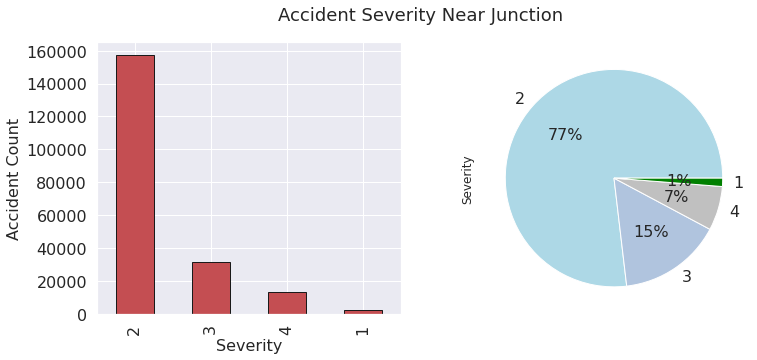

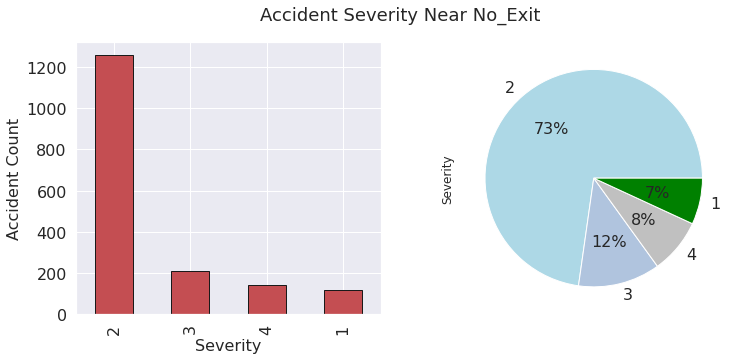

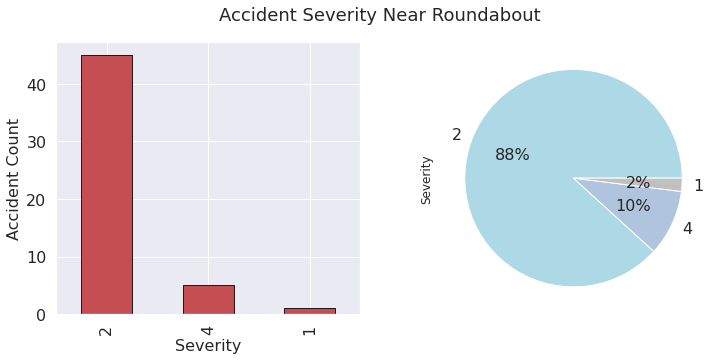

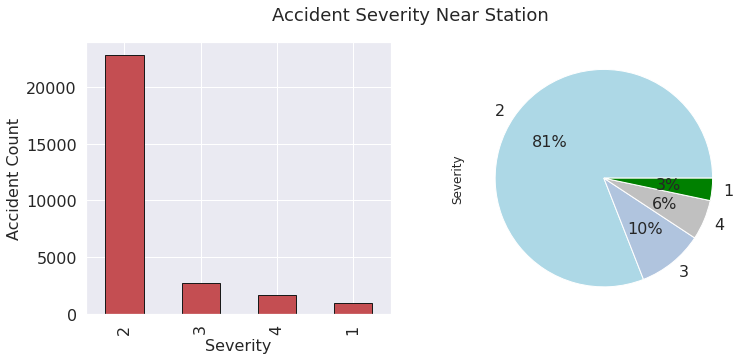

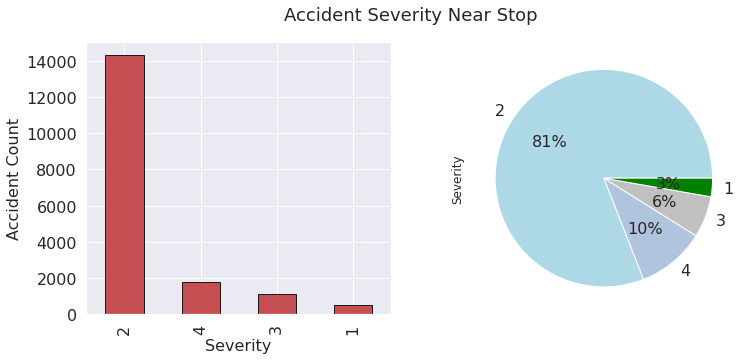

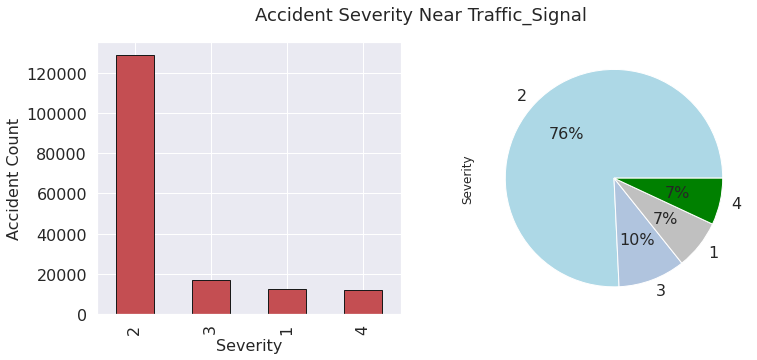

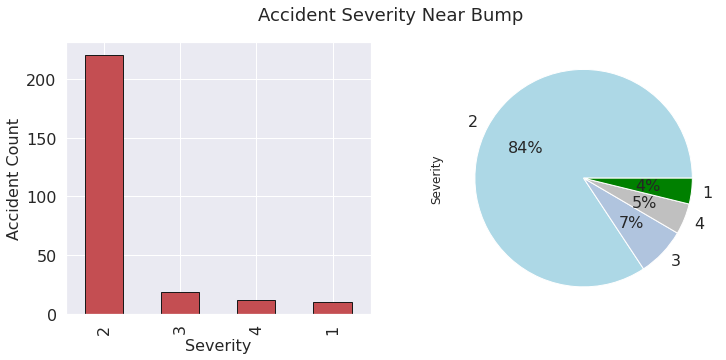

In [ ]:
for area in ['Crossing','Junction', 'No_Exit','Roundabout', 'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop','Bump']:
    # check if infrastructure type is found in any record 
    if (data[area] == True).sum() > 0:
        my_colors = ['lightblue','lightsteelblue','silver','green']
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + area,fontsize=18)
        plt.subplot(1,2,1)
        data.loc[data[area] == True]['Severity'].value_counts().plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        data.loc[data[area] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16,colors=my_colors)

In [ ]:
len(data.columns)

47

In [9]:
imp_features =["Severity","Start_Lat","Start_Lng","Distance(mi)","Wind_Speed(mph)","Amenity","Crossing","Junction","Railway","Station","Stop","Traffic_Signal"]

In [10]:
df_copy1 = data.filter(imp_features, axis=1)

In [11]:
df_copy2=df_copy1.dropna()

In [ ]:
( 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

# Data Predictive Modeling

In [16]:
from sklearn.model_selection import train_test_split
y_data = df_copy2['Severity'].values
X_data = df_copy2.drop('Severity', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train.shape

(929425, 11)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df_copy2.columns))) 

Features sorted by their rank:
[(1, 'Amenity'), (2, 'Junction'), (3, 'Wind_Speed(mph)'), (4, 'Start_Lng'), (5, 'Crossing'), (6, 'Station'), (7, 'Severity'), (8, 'Stop'), (9, 'Railway'), (10, 'Start_Lat'), (11, 'Distance(mi)')]


In [20]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.06337849508834759

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3853401491228502
Mean Squared Error: 0.33195478797766953
Root Mean Squared Error: 0.576155176994592


In [24]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


kfold = model_selection.KFold(n_splits=10)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [25]:
print("Logistic Regression :", results.mean())

Logistic Regression : 0.8067041413953442


In [18]:
bool_features = df_copy2.select_dtypes(include=['bool'])
print('Boolean features: {}'.format(bool_features.shape))
one_hot = pd.get_dummies(bool_features)
one_hot.reset_index(drop=True, inplace=True)
one_hot.head(5)

Boolean features: (1387202, 7)


,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [19]:
numerical_features =  df_copy2.select_dtypes(exclude=['bool'])
sc = StandardScaler()
y = df_copy2[['Severity']].values
y= sc.fit_transform(y)
numerical_features = numerical_features.drop(['Severity'], axis=1)
numerical_features = pd.DataFrame(sc.fit_transform(numerical_features), columns = numerical_features.columns)

In [20]:
X_data = np.concatenate((one_hot,numerical_features),axis=1)
df_concat = pd.concat([one_hot,numerical_features],axis=1)

In [21]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_data, y, test_size=0.2, random_state=42)
y_t=y_train1.ravel()
y_te=y_test1.ravel()

In [33]:
! pip install windrose
! pip install lightgbm
import lightgbm as lgb

In [34]:
lgb_train = lgb.Dataset(X_train1, y_t)
lgb_test = lgb.Dataset(X_test1, y_te)

In [35]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': {'rmse'},
            'num_leaves': 13,
            'max_depth': -1,
          'learning_rate': 0.8,
          'feature_fraction': 0.041,
          'bagging_fraction': 0.331,
          'bagging_freq' : 5
          }

In [36]:
gbm_reg = lgb.train(params,
              lgb_train,
              num_boost_round=4000,
              valid_sets=(lgb_train, lgb_test),
            early_stopping_rounds=20,
            verbose_eval = 20)

Training until validation scores don't improve for 20 rounds.
[20]	training's rmse: 0.922446	valid_1's rmse: 0.92103
[40]	training's rmse: 0.918843	valid_1's rmse: 0.917469
[60]	training's rmse: 0.917903	valid_1's rmse: 0.916691
[80]	training's rmse: 0.917509	valid_1's rmse: 0.916395
[100]	training's rmse: 0.916008	valid_1's rmse: 0.915015
[120]	training's rmse: 0.91594	valid_1's rmse: 0.914975
[140]	training's rmse: 0.915746	valid_1's rmse: 0.914852
[160]	training's rmse: 0.915551	valid_1's rmse: 0.914821
[180]	training's rmse: 0.915179	valid_1's rmse: 0.91451
Early stopping, best iteration is:
[176]	training's rmse: 0.915177	valid_1's rmse: 0.914491


In [1]:
y_pred=gbm_reg.predict(X_test1)

NameError: ignored

In [38]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_squared_error(y_test1, y_pred))
print("RMSE score:", score)

RMSE score: 0.9144914166295012


In [15]:
!pip install xgboost

In [16]:
!pip install --upgrade xgboost

     |████████████████████████████████| 173.5 MB 12 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [17]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
df_copy2['Severity1']=np.where(df_copy2['Severity']==4 ,'high','low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_copy2['Severity1'].value_counts()

low     1289475
high      97727
Name: Severity1, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
y_data = df_copy2['Severity1'].values
X_data = df_copy2.drop(['Severity','Severity1'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=42)
X_train.shape

(1109761, 11)

In [31]:
np.unique(y_train1)

array([-2.05532764, -0.37595616,  1.30341532,  2.9827868 ])

In [66]:

# fit model
model = XGBClassifier()
model.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21:20:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [69]:

# make predictions for test data
y_pred = model.predict(X_test1)
predictions = [value for value in y_pred]

In [70]:
np.unique(predictions)

array(['high', 'low'], dtype='<U4')

In [71]:
# evaluate predictions
accuracy = accuracy_score(y_test1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.75%


# Inference

*   Insights


